In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from pyscipopt import Model

In [3]:
miplib_dir = Path('../data/raw/MIPLIB/')

miplib_fps = list(miplib_dir.glob('**/*.mps.gz'))
len(miplib_fps)

1065

In [4]:
df = pd.read_csv('../data/raw/MIPLIB/The Collection Set.csv')
df.columns = [col.split(' ')[0] for col in df.columns]
df = df[df['Tags'].str.contains('set_packing')]
df

,Instance,Status,Variables,Binaries,Integers,Continuous,Constraints,Nonz.,Submitter,Group,Objective,Tags
0,10teams,easy,2025.0,1800.0,0.0,225,230,12150,MIPLIB submission pool,--,923.9999999999997,binary set_partitioning set_packing invariant_...
13,a2864-99blp,open,200787.0,200787.0,0.0,0,22117,20078717,Daniel Heinlein,selofsubspaces,-257*,binary set_packing invariant_knapsack
15,ab51-40-100,easy,12675.0,12675.0,0.0,0,11893,72745,MIPLIB submission pool,ab,-10420305975,binary decomposition numerics precedence set_p...
16,ab67-40-100,easy,12812.0,12812.0,0.0,0,12092,75871,MIPLIB submission pool,ab,-11186253442,binary decomposition numerics precedence set_p...
17,ab69-40-100,easy,12622.0,12622.0,0.0,0,11911,74233,MIPLIB submission pool,ab,-11186281442,binary decomposition numerics precedence set_p...
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,uct-subprob,easy,2256.0,379.0,0.0,1877,1973,10147,Gerald Lach,--,314,benchmark benchmark_suitable aggregations vari...
1052,usafa,open,228648.0,216357.0,12291.0,0,1377561,16485102,Christopher Daniel Richards,--,160.1671357657*,aggregations precedence variable_bound set_par...
1058,wachplan,easy,3361.0,3360.0,1.0,0,1553,89361,Sebastian Orlowski,--,-8,benchmark benchmark_suitable variable_bound se...
1060,woodlands09,hard,382147.0,382119.0,28.0,0,194599,2646003,George Fonseca,timetabling,0,aggregations variable_bound set_partitioning s...


In [5]:
n_sols = list()
for instance_name in df['Instance'].values:
    sol_fps = list(miplib_dir.glob(f'**/{instance_name}.sol.gz'))
    n_sols.append(len(sol_fps))

df['N. Sols'] = n_sols
df

,Instance,Status,Variables,Binaries,Integers,Continuous,Constraints,Nonz.,Submitter,Group,Objective,Tags,N. Sols
0,10teams,easy,2025.0,1800.0,0.0,225,230,12150,MIPLIB submission pool,--,923.9999999999997,binary set_partitioning set_packing invariant_...,1
13,a2864-99blp,open,200787.0,200787.0,0.0,0,22117,20078717,Daniel Heinlein,selofsubspaces,-257*,binary set_packing invariant_knapsack,1
15,ab51-40-100,easy,12675.0,12675.0,0.0,0,11893,72745,MIPLIB submission pool,ab,-10420305975,binary decomposition numerics precedence set_p...,1
16,ab67-40-100,easy,12812.0,12812.0,0.0,0,12092,75871,MIPLIB submission pool,ab,-11186253442,binary decomposition numerics precedence set_p...,1
17,ab69-40-100,easy,12622.0,12622.0,0.0,0,11911,74233,MIPLIB submission pool,ab,-11186281442,binary decomposition numerics precedence set_p...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,uct-subprob,easy,2256.0,379.0,0.0,1877,1973,10147,Gerald Lach,--,314,benchmark benchmark_suitable aggregations vari...,3
1052,usafa,open,228648.0,216357.0,12291.0,0,1377561,16485102,Christopher Daniel Richards,--,160.1671357657*,aggregations precedence variable_bound set_par...,1
1058,wachplan,easy,3361.0,3360.0,1.0,0,1553,89361,Sebastian Orlowski,--,-8,benchmark benchmark_suitable variable_bound se...,2
1060,woodlands09,hard,382147.0,382119.0,28.0,0,194599,2646003,George Fonseca,timetabling,0,aggregations variable_bound set_partitioning s...,1


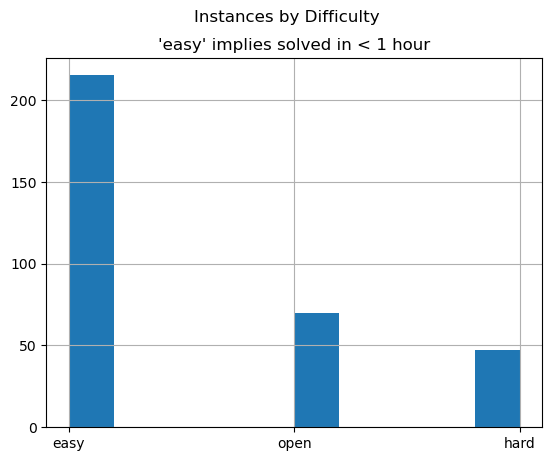

In [13]:
df['Status'].hist()
plt.suptitle('Instances by Difficulty')
plt.title("'easy' implies solved in < 1 hour")
plt.show()

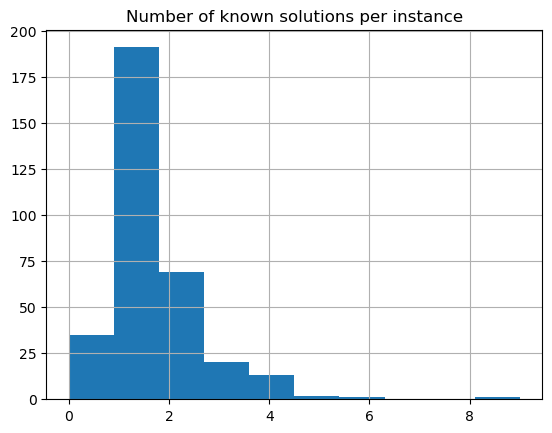

In [14]:
df['N. Sols'].hist()
plt.title('Number of known solutions per instance')
plt.show()

## Solving using solutions as warmstart

In [24]:
instance_name = df[df['Status'] == 'open'].iloc[0]['Instance']

instance_fp = next(miplib_dir.glob(f'**/{instance_name}.mps.gz'))

m = Model()
m.readProblem(str(instance_fp))
m.setRealParam('limits/time', 60.0)

m.optimize()

original problem has 200787 variables (200787 bin, 0 int, 0 impl, 0 cont) and 22117 constraints
presolving:
(round 1, fast)       186963 del vars, 17 del conss, 0 add conss, 17 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 20160 clqs
(round 2, fast)       373909 del vars, 1224 del conss, 0 add conss, 17 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 20160 clqs
   (26.2s) running MILP presolver
   (26.4s) MILP presolver (2 rounds): 0 aggregations, 0 fixings, 0 bound changes
(round 3, exhaustive) 373909 del vars, 1532 del conss, 0 add conss, 17 chg bounds, 84 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 20160 clqs
(round 4, exhaustive) 373909 del vars, 1532 del conss, 0 add conss, 17 chg bounds, 84 chg sides, 0 chg coeffs, 20585 upgd conss, 0 impls, 20160 clqs
   (30.3s) probing: 51/13824 (0.4%) - 0 fixings, 0 aggregations, 0 implications, 0 bound changes
   (30.3s) probing aborted: 50/50 successive totally useless probings
   (34.4s) symmetry computatio

In [26]:
def are_solutions_equal(m, sol1, sol2):
    for var in m.getVars():
        if m.getSolVal(sol1, var) != m.getSolVal(sol2, var):
            return False
    return True

sol_fp = next(miplib_dir.glob(f'**/{instance_name}.sol.gz'))
miplib_solution = m.readSolFile(sol_fp)

are_solutions_equal(m, m.getBestSol(), miplib_solution)

False

In [18]:
instance_name = df[df['Status'] == 'open'].iloc[0]['Instance']

instance_fp = next(miplib_dir.glob(f'**/{instance_name}.mps.gz'))

m = Model()
m.readProblem(str(instance_fp))

for sol_fp in miplib_dir.glob(f'**/{instance_name}.sol.gz'):
    m.readSol(str(sol_fp))

m.setRealParam('limits/time', 60.0)

m.optimize()

original problem has 200787 variables (200787 bin, 0 int, 0 impl, 0 cont) and 22117 constraints
primal solution from solution file </home/bruno/learn2schedule/data/raw/MIPLIB/solutions/a2864-99blp/1/a2864-99blp.sol.gz> was accepted as candidate, will be checked when solving starts
original problem has 200787 variables (200787 bin, 0 int, 0 impl, 0 cont) and 22117 constraints
1/1 feasible solution given by solution candidate storage, new primal bound -2.570000e+02

presolving:
(round 1, fast)       186963 del vars, 17 del conss, 0 add conss, 17 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 20160 clqs
(round 2, fast)       373909 del vars, 1224 del conss, 0 add conss, 17 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 20160 clqs
   (27.4s) running MILP presolver
   (27.6s) MILP presolver (2 rounds): 0 aggregations, 0 fixings, 0 bound changes
(round 3, exhaustive) 373909 del vars, 1532 del conss, 0 add conss, 17 chg bounds, 84 chg sides, 0 chg coeffs, 0 upgd 

In [23]:
sols = m.getSols()

pyscipopt.scip.Solution